**Objective:**

This is an introductory notebook for people wanting to get started with [H2O](https://www.h2o.ai/products/h2o/) (the open source machine learning package by H2O.ai) 

**What is H2O?:**

H2O is a Java-based software for data modeling and general computing. There are many different perceptions of the H2O software, but the primary purpose of H2O is as a distributed (many machines), parallel (many CPUs), in memory (several hundred GBs Xmx) processing engine. 

Wait, we as Data Scientists do not need to know Java for using H2O to build models. We can use our favorite language (Python or R) :) 

** H2O - Key Features:**

Some of the key features 
1. Access from both R and Python
2. Access from  web-based interface named Flow. By means of Flow, data scientists are able to import, explore, and modify datasets, play with models, verify models performances, and much more. (This is not accessible here in Kaggle Kernels)
3. AutoML : automatic training and tuning of many models within a user-specified time-limit. 
4. Distributed, In-memory processing : In-memory processing with fast serialization between nodes and clusters to support massive datasets. 
5. Simple Deployment : Easy to deploy POJOs and MOJOs to deploy models for fast and accurate scoring in any environment, including with very large models.

Let us first import the necessary modules.

In [1]:
#! pip install h2o

In [2]:
import h2o
import time
import seaborn
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator

%matplotlib inline

Once the module in imported, the first step is to initialize the h2o module. 

The *h2o.init()* command is pretty smart and does a lot of things. First, an attempt is made to search for an existing H2O instance being started already, before starting a new one. When none is found automatically or specified manually with argument available, a new instance of H2O is started. 

During startup, H2O is going to print some useful information. Version of the Python it is running on, H2O’s version, how to connect to H2O’s Flow interface or where error logs reside, just to name a few.

In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) Client VM (build 25.191-b12, mixed mode)


C:\Users\gospu\Anaconda3\lib\site-packages\h2o\backend\server.py:369: UserWarning:   You have a 32-bit version of Java. H2O works best with 64-bit Java.
  Please download the latest 64-bit Java SE JDK from Oracle.

  warn("  You have a 32-bit version of Java. H2O works best with 64-bit Java.\n"


  Starting server from C:\Users\gospu\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\gospu\AppData\Local\Temp\tmpyqs19_x7
  JVM stdout: C:\Users\gospu\AppData\Local\Temp\tmpyqs19_x7\h2o_gospurs927_started_from_python.out
  JVM stderr: C:\Users\gospu\AppData\Local\Temp\tmpyqs19_x7\h2o_gospurs927_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,America/Chicago
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.3
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_gospurs927_h6fceq
H2O cluster total nodes:,1
H2O cluster free memory:,247.5 Mb
H2O cluster total cores:,0
H2O cluster allowed cores:,0
H2O cluster status:,"accepting new members, healthy"


**Data Exploration:**

Now that the initialization is done, let us first import the dataset. The command is very similar to *pandas.read_csv* and the data is stored in memory as [H2OFrame](http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/frame.html)

H2O supports various file formats and data sources. More detailed information can be seen [here](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/getting-data-into-h2o.html).

In [4]:
diabetes_df = h2o.import_file("diabetes.csv", destination_frame="diabetes_df")

Parse progress: |█████████████████████████████████████████████████████████| 100%


We can also see the progress when the loading happens. This will be very helpful while dealing with larger datasets.

As a first step, let us have a look at the dataset. 

In [5]:
diabetes_df.describe()

Rows:768
Cols:9




,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
type,int,int,int,int,int,real,real,int,int
mins,0.0,0.0,0.0,0.0,0.0,0.0,0.078,21.0,0.0
mean,3.845052083333336,120.89453125,69.10546874999994,20.536458333333357,79.79947916666666,31.99257812500003,0.4718763020833334,33.240885416666615,0.3489583333333333
maxs,17.0,199.0,122.0,99.0,846.0,67.1,2.42,81.0,1.0
sigma,3.36957806269887,31.972618195136224,19.355807170644777,15.952217567727642,115.24400235133803,7.884160320375441,0.331328595012775,11.760231540678689,0.47695137724279896
zeros,111,5,35,227,374,11,0,0,500
missing,0,0,0,0,0,0,0,0,0
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0


*describe()* gives out a lot of information. 
1. Number of rows and columns in the dataset
2. A number of summary statistics about the dataset such as 
    * Data type of the column such as integer, categorical etc
    * Minimum value
    * Mean value
    * Maximum value
    * Standard deviation value
    * Number of zeros in the column
    * Number of missing values in the column
3. A look at the top few rows

Now let us look at the distribution of the individual features using *hist()* command 

In [6]:
import matplotlib as mpl
mpl.__version__

'2.2.2'

C:\Users\gospu\Anaconda3\lib\site-packages\matplotlib\__init__.py:1855: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


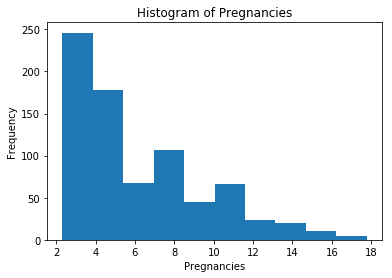

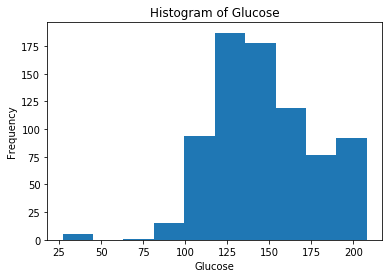

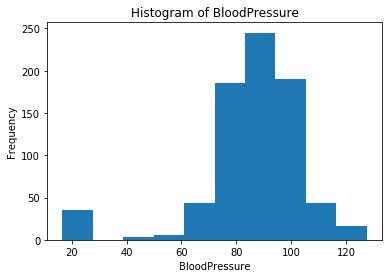

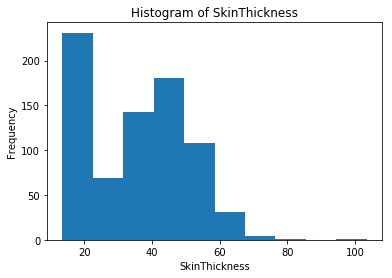

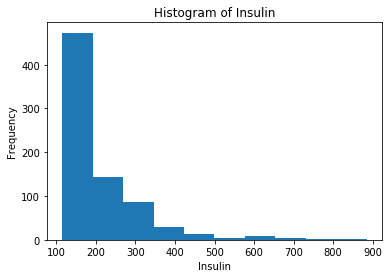

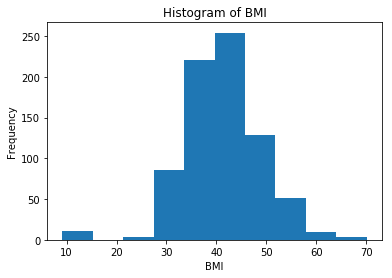

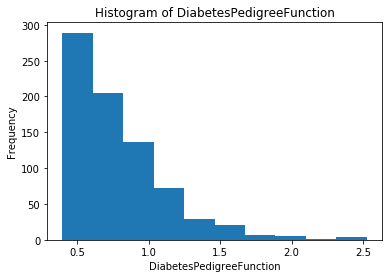

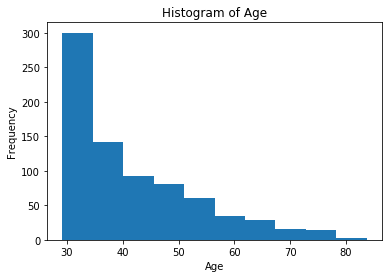

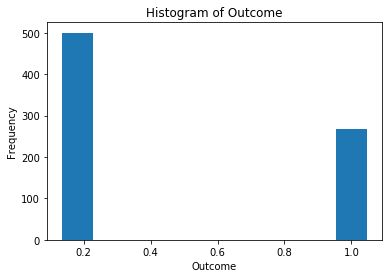

In [7]:
for col in diabetes_df.columns:
    diabetes_df[col].hist()

Now let us also look at the correlation of the individual features. We can use the *cor()* function in H2OFrame for the same.

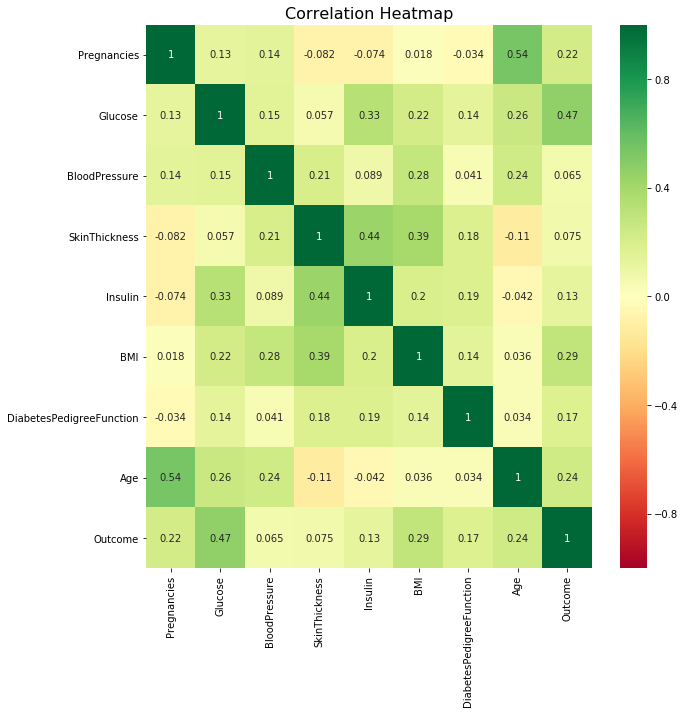

In [8]:
plt.figure(figsize=(10,10))
corr = diabetes_df.cor().as_data_frame()
corr.index = diabetes_df.columns
sns.heatmap(corr, annot = True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

Let us now split the data into three parts - train, valid and test datasets - at a ratio of 60%, 20% and 20% respectively. We could use *split_frame()* function for the same.

In [9]:
train, valid, test = diabetes_df.split_frame(ratios=[0.6,0.2], seed=1234)
response = "Outcome"
train[response] = train[response].asfactor()
valid[response] = valid[response].asfactor()
test[response] = test[response].asfactor()
print("Number of rows in train, valid and test set : ", train.shape[0], valid.shape[0], test.shape[0])

Number of rows in train, valid and test set :  465 148 155


**Modeling and Model Tuning : **

Now, let us build a baseline model using these splits. There are [multiple algorithms](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science.html) available in the H2O module. We can start with the Kaggler's favorite - GBM.

Please note that the target variable is "Outcome" and rest of the features are as input features. Since this is a baseline model, let us use the default parameters.

In [10]:
predictors = diabetes_df.columns[:-1]
gbm = H2OGradientBoostingEstimator()
gbm.train(x=predictors, y=response, training_frame=train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


Again, it is good to see the model building progress.

Now let us do a *print(model_name)* to understand more about the model.

In [11]:
print(gbm)

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1548762371303_1


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.05394537414652564
RMSE: 0.2322614349101582
LogLoss: 0.21164045617145613
Mean Per-Class Error: 0.05419671999032927
AUC: 0.9899262602248459
pr_auc: 0.9784923662885114
Gini: 0.9798525204496917
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.46220528851885034: 


,0,1,Error,Rate
0,290.0,9.0,0.0301,(9.0/299.0)
1,14.0,152.0,0.0843,(14.0/166.0)
Total,304.0,161.0,0.0495,(23.0/465.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4622053,0.9296636,150.0
max f2,0.3238256,0.9448357,176.0
max f0point5,0.5480218,0.9673025,132.0
max accuracy,0.5069764,0.9505376,142.0
max precision,0.9838497,1.0,0.0
max recall,0.1733829,1.0,227.0
max specificity,0.9838497,1.0,0.0
max absolute_mcc,0.5069764,0.8920664,142.0
max min_per_class_accuracy,0.3721344,0.9397993,163.0
max mean_per_class_accuracy,0.3704585,0.9458033,164.0


Gains/Lift Table: Avg response rate: 35.70 %, avg score: 35.71 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0107527,0.9647603,2.8012048,2.8012048,1.0,0.9701344,1.0,0.9701344,0.0301205,0.0301205,180.1204819,180.1204819
,2,0.0215054,0.9598415,2.8012048,2.8012048,1.0,0.9634412,1.0,0.9667878,0.0301205,0.0602410,180.1204819,180.1204819
,3,0.0301075,0.9481976,2.8012048,2.8012048,1.0,0.9528239,1.0,0.9627981,0.0240964,0.0843373,180.1204819,180.1204819
,4,0.0408602,0.9440162,2.8012048,2.8012048,1.0,0.9462455,1.0,0.9584422,0.0301205,0.1144578,180.1204819,180.1204819
,5,0.0516129,0.9402434,2.8012048,2.8012048,1.0,0.9422679,1.0,0.9550725,0.0301205,0.1445783,180.1204819,180.1204819
,6,0.1010753,0.9109362,2.8012048,2.8012048,1.0,0.9246690,1.0,0.9401942,0.1385542,0.2831325,180.1204819,180.1204819
,7,0.1505376,0.8685528,2.8012048,2.8012048,1.0,0.8898148,1.0,0.9236410,0.1385542,0.4216867,180.1204819,180.1204819
,8,0.2,0.7970538,2.8012048,2.8012048,1.0,0.8346415,1.0,0.9016303,0.1385542,0.5602410,180.1204819,180.1204819
,9,0.3010753,0.5563266,2.8012048,2.8012048,1.0,0.6801791,1.0,0.8272860,0.2831325,0.8433735,180.1204819,180.1204819
,10,0.4,0.3260873,1.1570194,2.3945783,0.4130435,0.4418483,0.8548387,0.7319627,0.1144578,0.9578313,15.7019382,139.4578313



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
,2019-01-29 05:47:40,0.015 sec,0.0,0.4791116,0.6516662,0.5,0.0,1.0,0.6430108
,2019-01-29 05:47:41,0.193 sec,1.0,0.4566016,0.6062100,0.8991115,0.5726834,2.8012048,0.1784946
,2019-01-29 05:47:41,0.210 sec,2.0,0.4371737,0.5688548,0.9180501,0.6699546,2.8012048,0.1548387
,2019-01-29 05:47:41,0.223 sec,3.0,0.4205751,0.5378978,0.9199944,0.6720556,2.8012048,0.1569892
,2019-01-29 05:47:41,0.232 sec,4.0,0.4059872,0.5111693,0.9259379,0.8401345,2.8012048,0.1483871
---,---,---,---,---,---,---,---,---,---
,2019-01-29 05:47:41,0.507 sec,46.0,0.2413702,0.2234642,0.9872064,0.9743236,2.8012048,0.0537634
,2019-01-29 05:47:41,0.512 sec,47.0,0.2406076,0.2224398,0.9873675,0.9746131,2.8012048,0.0537634
,2019-01-29 05:47:41,0.519 sec,48.0,0.2389076,0.2197529,0.9876093,0.9749423,2.8012048,0.0537634
,2019-01-29 05:47:41,0.525 sec,49.0,0.2375624,0.2179044,0.9879720,0.9754953,2.8012048,0.0516129



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Glucose,160.8897247,1.0,0.3861147
BMI,107.1570282,0.6660278,0.2571631
DiabetesPedigreeFunction,49.3825264,0.3069340,0.1185117
Age,28.7894745,0.1789392,0.0690910
BloodPressure,24.5161362,0.1523785,0.0588356
Pregnancies,22.0554619,0.1370843,0.0529303
Insulin,12.9495811,0.0804873,0.0310773
SkinThickness,10.9490166,0.0680529,0.0262762


Now that is quite a bit of information. We can look at them individually.
1. First, we get the name of the model and a key to acces the model ( key is not much useful for us I guess )
2. Error metrics on the train data like log-loss, mean per class error, AUC, Gini, MSE, RMSE
3. Confusion matrix for max F1 threshold
4. Threshold values for different metrics
5. Gains / Lift table 
6. Scoring history - information on how the metrics changed in each of the epochs
7. Feature importance

Okay. I heard you. How can we use the metrics of train set (as we actually trained on this dataset). We need to evaluate them from the valid set. We can use the *model_performance()* function for the same. We can then print the metrics. 

In [12]:
perf = gbm.model_performance(valid)
print(perf)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.18115330538099383
RMSE: 0.4256210819273334
LogLoss: 0.5366686568411096
Mean Per-Class Error: 0.25621588841722254
AUC: 0.804932282191227
pr_auc: 0.6269893119126704
Gini: 0.6098645643824541
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1458393490707833: 


,0,1,Error,Rate
0,53.0,44.0,0.4536,(44.0/97.0)
1,3.0,48.0,0.0588,(3.0/51.0)
Total,56.0,92.0,0.3176,(47.0/148.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1458393,0.6713287,91.0
max f2,0.1125309,0.8199357,106.0
max f0point5,0.6684258,0.6424581,31.0
max accuracy,0.6684258,0.75,31.0
max precision,0.9807389,1.0,0.0
max recall,0.1125309,1.0,106.0
max specificity,0.9807389,1.0,0.0
max absolute_mcc,0.1458393,0.4777695,91.0
max min_per_class_accuracy,0.3285813,0.6862745,64.0
max mean_per_class_accuracy,0.1458393,0.7437841,91.0


Gains/Lift Table: Avg response rate: 34.46 %, avg score: 36.45 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0135135,0.9730977,1.4509804,1.4509804,0.5,0.9772279,0.5,0.9772279,0.0196078,0.0196078,45.0980392,45.0980392
,2,0.0202703,0.9668724,2.9019608,1.9346405,1.0,0.9723995,0.6666667,0.9756184,0.0196078,0.0392157,190.1960784,93.4640523
,3,0.0337838,0.9523557,2.9019608,2.3215686,1.0,0.9637757,0.8,0.9708814,0.0392157,0.0784314,190.1960784,132.1568627
,4,0.0405405,0.9279944,2.9019608,2.4183007,1.0,0.9398704,0.8333333,0.9657129,0.0196078,0.0980392,190.1960784,141.8300654
,5,0.0540541,0.9231616,1.4509804,2.1764706,0.5,0.9254153,0.75,0.9556385,0.0196078,0.1176471,45.0980392,117.6470588
,6,0.1013514,0.8922442,2.0728291,2.1281046,0.7142857,0.9063491,0.7333333,0.9326368,0.0980392,0.2156863,107.2829132,112.8104575
,7,0.1554054,0.8360014,2.1764706,2.1449275,0.75,0.8618247,0.7391304,0.9080065,0.1176471,0.3333333,117.6470588,114.4927536
,8,0.2027027,0.7225152,1.6582633,2.0313725,0.5714286,0.7730923,0.7,0.8765265,0.0784314,0.4117647,65.8263305,103.1372549
,9,0.3040541,0.5171489,1.5477124,1.8701525,0.5333333,0.6056568,0.6444444,0.7862366,0.1568627,0.5686275,54.7712418,87.0152505
,10,0.3986486,0.4098378,1.0364146,1.6723164,0.3571429,0.4615336,0.5762712,0.7091884,0.0980392,0.6666667,3.6414566,67.2316384


So using our baseline model, we are getting about 0.8 auc in valid set and 0.98 auc in train set. Similarly, log loss is 0.53 in valid set and 0.21 in train set. 

Now we can use the validation set to tune our parameters. We can use the early stopping to find the number of iterations to train similar to other GBM implementations. We can set some random values for the parameters to start with. Please note that, we have added a new *validation_frame* parameter in this one compared to the previous one while training. 

In [13]:
gbm_tune = H2OGradientBoostingEstimator(
    ntrees = 3000,
    learn_rate = 0.01,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    col_sample_rate = 0.7,
    sample_rate = 0.7,
    seed = 1234
)      
gbm_tune.train(x=predictors, y=response, training_frame=train, validation_frame=valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


Now let us check the validation auc to check the performance.

In [14]:
gbm_tune.model_performance(valid).auc()

0.8019001414998989

We are getting similar performance (0.8 valid AUC) using this new model with early stopping too. 

**Grid Search:**

Now let us do grid search to find the best paramters for GBM model. 

In [15]:
from h2o.grid.grid_search import H2OGridSearch

gbm_grid = H2OGradientBoostingEstimator(
    ntrees = 3000,
    learn_rate = 0.01,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    col_sample_rate = 0.7,
    sample_rate = 0.7,
    seed = 1234
) 

hyper_params = {'max_depth':[4,6,8,10,12]}
grid = H2OGridSearch(gbm_grid, hyper_params,
                         grid_id='depth_grid',
                         search_criteria={'strategy': "Cartesian"})
#Train grid search
grid.train(x=predictors, 
           y=response,
           training_frame=train,
           validation_frame=valid)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [16]:
print(grid)

    max_depth           model_ids             logloss
0          10  depth_grid_model_4  0.5610332739005056
1          12  depth_grid_model_5  0.5610431620153586
2           8  depth_grid_model_3  0.5618675574114658
3           6  depth_grid_model_2  0.5688369200105283
4           4  depth_grid_model_1  0.5720338350452505



So this has printed the log loss performance at various depths. If we want to look at the validation AUC, then we can use the following.

In [17]:
sorted_grid = grid.get_grid(sort_by='auc',decreasing=True)
print(sorted_grid)

    max_depth           model_ids                 auc
0          12  depth_grid_model_5  0.8067515666060238
1          10  depth_grid_model_4  0.8067515666060238
2           8  depth_grid_model_3  0.8033151404891854
3           6  depth_grid_model_2  0.8031129977764302
4           4  depth_grid_model_1  0.7984637153830605



Interestingly, there is not much change in the AUC for the top two results. Since we train on a very small sample, we might be getting this.

Also please note that, we just searched for the *max_depth* parameter. Please do a more comprehensive search for better results. Please refer to this [notebook](https://github.com/h2oai/h2o-3/blob/master/h2o-docs/src/product/tutorials/gbm/gbmTuning.ipynb) for more comprehensive details on finetuning. 

**K-Fold cross validation:**

Most of the times, we will just do K-fold cross valdiation. So now let us do the same using H2O. Just setting the *nfolds* parameter in the model will do the k-fold cross validation.

In [18]:
cv_gbm = H2OGradientBoostingEstimator(
    ntrees = 3000,
    learn_rate = 0.05,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    nfolds=4, 
    seed=2018)
cv_gbm.train(x = predictors, y = response, training_frame = train, validation_frame=valid)
cv_summary = cv_gbm.cross_validation_metrics_summary().as_data_frame()
cv_summary

gbm Model Build progress: |███████████████████████████████████████████████| 100%


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid
0,accuracy,0.8060614,0.017677339,0.81512606,0.84166664,0.775,0.7924528
1,auc,0.83460003,0.015514333,0.8711854,0.82493657,0.81303704,0.8292411
2,err,0.19393861,0.017677339,0.18487395,0.15833333,0.225,0.20754717
3,err_count,22.5,2.0310097,22.0,19.0,27.0,22.0
4,f0point5,0.7166275,0.014608963,0.7432432,0.6993007,0.6938776,0.7300885
5,f1,0.7359389,0.031757645,0.8,0.6779661,0.7157895,0.75
6,f2,0.75854874,0.05272604,0.86614174,0.65789473,0.73913044,0.77102804
7,lift_top_group,2.0913858,0.39809096,1.2395834,1.9354838,2.6666667,2.5238094
8,logloss,0.4842181,0.018892443,0.46077308,0.45635447,0.52019364,0.49955118
9,max_per_class_error,0.2667725,0.037390944,0.2535211,0.3548387,0.24444444,0.21428572


Now let us test the performance on the valid set just like before. 

In [19]:
cv_gbm.model_performance(valid).auc()

0.8059429957550029

**XGBoost:**

Recently H2O has also added the XGBoost version of GBM into its kitty. Now let us see how to use the XGBoost model in H2O. We follow the same code convention as that of GBM except that we will use *H2OXGBoostEstimator* function. 

In [20]:
from h2o.estimators import H2OXGBoostEstimator

cv_xgb = H2OXGBoostEstimator(
    ntrees = 3000,
    learn_rate = 0.05,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    nfolds=4, 
    seed=2018)
cv_xgb.train(x = predictors, y = response, training_frame = train, validation_frame=valid)
cv_xgb.model_performance(valid).auc()

H2OResponseError: Server error water.exceptions.H2ONotFoundArgumentException:
  Error: POST /3/ModelBuilders/xgboost not found
  Request: POST /3/ModelBuilders/xgboost
    data: {'ntrees': '3000', 'learn_rate': '0.05', 'stopping_rounds': '20', 'stopping_metric': 'AUC', 'nfolds': '4', 'seed': '2018', 'training_frame': 'py_62_sid_8a24', 'validation_frame': 'py_63_sid_8a24', 'response_column': 'Outcome'}


Not much improvement in the performance. Probably we need to tune the parameters more. 

Getting the variable importances plot from a model is simple too. *varimp_plot()* will get us that. Now let us check the variable importance of the XGBoost model.

In [ ]:
cv_xgb.varimp_plot()

**AutoML : Automatic Machine Learning:**

From the [H2O AutoML page](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html),

*H2O’s AutoML can be used for automating the machine learning workflow, which includes automatic training and tuning of many models within a user-specified time-limit. Stacked Ensembles will be automatically trained on collections of individual models to produce highly predictive ensemble models which, in most cases, will be the top performing models in the AutoML Leaderboard.*

So let us use the *H2OAutoML* function to do automatic machine learning. We can specify the *max_models* parameter which indicates the number of individual (or "base") models, and does not include the two ensemble models that are trained at the end.

In [ ]:
from h2o.automl import H2OAutoML

aml = H2OAutoML(max_models = 10, max_runtime_secs=100, seed = 1)
aml.train(x=predictors, y=response, training_frame=train, validation_frame=valid)

Now let us look at the automl leaderboard.

In [ ]:
lb = aml.leaderboard
lb

AutoML has built variety of models inlcuding GBM, GLM, Deep Learning and XRT (Extremely Randomized Trees) and then build two stacked ensemble models (the first two in the leaderboard) on top of them and the best model is a stacked ensemble. 

Now let us look at the contribution of the individual models for this meta learner. 

In [ ]:
metalearner = h2o.get_model(aml.leader.metalearner()['name'])
metalearner.std_coef_plot()

So GBM is the topmost contributor to the ensemble followed by GLM and DL. 

**References:**

1. [GBM tuning tutorial for python](https://github.com/h2oai/h2o-3/blob/master/h2o-docs/src/product/tutorials/gbm/gbmTuning.ipynb)
2. [Machine Learning with H2O](https://dzone.com/articles/machine-learning-with-h2o-hands-on-guide-for-data)
3. [XGBoost in H2O platform](https://blog.h2o.ai/2017/06/xgboost-in-h2o-machine-learning-platform/)
4. [AutoML H2O Demo](https://github.com/h2oai/h2o-tutorials/blob/master/h2o-world-2017/automl/Python/automl_binary_classification_product_backorders.ipynb)
5. [AutoML Docs](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html)


**More to come. Stay tuned.!**

Disclaimer : I am currently working as a Data Scientist at H2O.ai